# Modelo general para PFR Isotérmico

Este modelo aplica para fase líquida en donde asumimos que la velocidad es constante. En otro cuaderno estaremos resolviendo para fae gaseosa.

Supongamos que tenemos una reacción química A + B -> C

![newnotebook](./imágenes/modelo1.png)
de igual forma supondremos que la temperatura es constante, es decir, el reactor es isotérmico. Ahora podemos escribir nuestro sistema de ecuaciones diferenciales ordinarias (EDO):
![newnotebook](./imágenes/modelo2.png)

Ahora resolvamos este sistema con Python. Para eso, usaremos el solucionador de ODE solve_ivp de SciPy.

## CÓDIGO

In [21]:
# Importar paquetes de las librerías

import math
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# introducir los parámetros de velocidad (u) y KAB
# velocidad u en reactor dimensionales: m/s
u = 4.0
# Coeficiente cinético de reacción dimensionales m3/(mol s)
# recordar que el coeficiente depende del orden de la reacción
kAB = 1.0e2

In [23]:
# definir el modelo de velocidad de reacción como una función. Esto devolverá una lista de velocidades de reacción dependiendo de las concentraciones
def simple_reaction(C, k):
    #C es una lista que contiene las concentraciones de todas las especies
    # Se puede acceder a los elementos de una lista con corchetes []
    # recuerda que en Python la numeración de listas y arreglos comienza con 0
    r = k * C[0] * C[1]
    return [-r, -r, r]

In [24]:
# a continuación definir el modelo de reactor de flujo pistón
def plug_flow_reactor(z, C, u, model_param, reaction_model):
    # el modelo es muy simple. Dividir todas las velocidades de reacción por la velocidad
     return [r / u for r in reaction_model(C, model_param)] 

# definir los valores iniciales para C y el tramo para el cálculo (0 a 1 m), donde 1 m es la longitud
C0 = [0.6, 0.4, 0.0]
span = [0.0, 1.0]

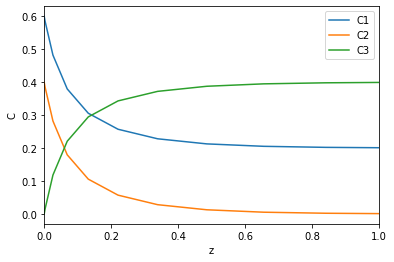

In [27]:
# resolver el problema y graficar la solución
# tenga en cuenta cómo podemos pasar parámetros a la función usando el argumento de solve_ivp
sol = solve_ivp(plug_flow_reactor, span, C0, args = (u, kAB, simple_reaction))

# para una gráfica rápida podemos usar matplotlib.pyplot que proporciona un trazado similar a Matlab
# interfaz
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))
plt.show()


Sin embargo, ¿qué pasa si tenemos un equilibrio donde el componente C se descompone en A y C? Entonces las ecuaciones de velocidad se verían así:
![newnotebook](./imágenes/modelo3.png)

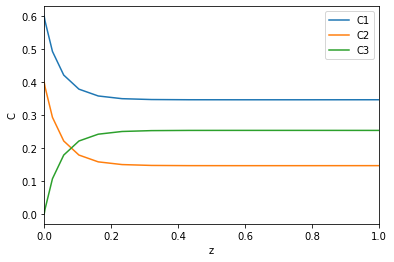

In [31]:
# definir el modelo de velocidad de reacción. Devuelve una lista de velocidades de reacción dependiendo de
# las concentraciones.
# Observe cómo ahora k es una lista

def equilibrium_reaction(C, k): 
    r1 = k[0] * C[0] * C[1]
    r2 = k[1] * C[2]
    return [-r1 + r2, -r1 + r2, r1 - r2]


# podemos reutilizar el modelo de reactor de flujo pistón
# def plug_flow_reactor_2(z, C, u, k): 
#    return [r / u for r in reaction_rates_2(C, k)] 
k_2 = [1.0e2, 0.2e2]


#concentraciones iniciales

sol = solve_ivp(plug_flow_reactor, span, C0, args = (u, k_2, equilibrium_reaction))

# gráfica de solución
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3"])
plt.xlim((0., 1.0))
plt.show()

Por supuesto, ya no obtenemos la conversión completa del reactivo limitante, pero toda la reacción llega a un equilibrio. Hagamos un ejemplo más donde hay una reacción entre las especies C y A.
A + B -> C and C + B -> D
![newnotebook](./imágenes/modelo4.png)

In [32]:
# Definir el modelo de velocidad de reacción. Devuelve una lista de velocidades de reacción dependiendo de
# las concentraciones.
# Observe cómo ahora k es una lista

def simple_reaction_2(C, k): 
    r1 = k[0] * C[0] * C[1]
    r2 = k[1] * C[2] * C[1]
    return [-r1, -r1, r1 - r2, r2]

k_2 = [1.0e2, 0.5e2]

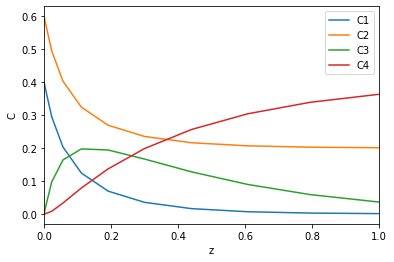

In [33]:
# Ahora tenemos cuatro especies, por lo que la lista de concentraciones iniciales también debe
# tener longitud 4.

C0 = [0.4, 0.6, 0, 0]
sol = solve_ivp(plug_flow_reactor, span, C0, args = (u, k_2, simple_reaction_2))

plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])
plt.plot(sol.t, sol.y[3,:])
plt.xlabel("z")
plt.ylabel("C")
plt.legend(["C1", "C2", "C3", "C4"])
plt.xlim((0., 1.0))
plt.show()